In [97]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from IPython.display import display

In [98]:
df_data = pd.read_csv('Data/cleaned_hotel_reviews.csv')
df_data

,Review,Rating,label,clean_punc,lemmatized_review,number_review
0,nice hotel expensive parking got good deal sta...,4,positive,nice hotel expensive parking got good deal sta...,nice hotel expensive park get good deal stay h...,nice hotel expensive park get good deal stay h...
1,ok nothing special charge diamond member hilto...,2,negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,neutral,nice rooms not 4 experience hotel monaco seatt...,nice room not 4 experience hotel monaco seattl...,nice room not experience hotel monaco seattle ...
3,"unique, great stay, wonderful time hotel monac...",5,positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,great stay great stay go seahawk game awesome ...
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,positive,best kept secret 3rd time staying charm not 5s...,best keep secret 3rd time stay charm not 5star...,best keep secret time stay charm not ca nt bea...
20487,great location price view hotel great quick pl...,4,positive,great location price view hotel great quick pl...,great location price view hotel great quick pl...,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,negative,ok just looks nice modern outside desk staff n...,ok just look nice modern outside desk staff nt...,ok just look nice modern outside desk staff nt...
20489,hotel theft ruined vacation hotel opened sept ...,1,negative,hotel theft ruined vacation hotel opened sept ...,hotel theft ruin vacation hotel open sept 17 2...,hotel theft ruin vacation hotel open sept gues...


In [99]:
negative_reviews = df_data[df_data['label'] == 'negative']['lemmatized_review']
positive_reviews = df_data[df_data['label'] == 'positive']['lemmatized_review']
neutral_reviews = df_data[df_data['label'] == 'neutral']['lemmatized_review']


all_reviews = df_data['lemmatized_review']

vectorizer = TfidfVectorizer()
tfidf_all = vectorizer.fit_transform(all_reviews)

tfidf_negative = vectorizer.transform(negative_reviews)
tfidf_positive = vectorizer.transform(positive_reviews)
tfidf_neutral = vectorizer.transform(neutral_reviews)

top_words_negative = {word: score for word, score in zip(vectorizer.get_feature_names_out(), np.max(tfidf_negative.toarray(), axis=0))} 
top_words_positive = {word: score for word, score in zip(vectorizer.get_feature_names_out(), np.max(tfidf_positive.toarray(), axis=0))}
top_words_neutral = {word: score for word, score in zip(vectorizer.get_feature_names_out(), np.max(tfidf_neutral.toarray(), axis=0))}

wordcloud_negative = WordCloud(max_font_size = 160, margin=0, background_color = "white").generate_from_frequencies(top_words_negative)
wordcloud_positive = WordCloud(max_font_size = 160, margin=0, background_color = "white").generate_from_frequencies(top_words_positive)
wordcloud_neutral = WordCloud(max_font_size = 160, margin=0, background_color = "white").generate_from_frequencies(top_words_neutral)

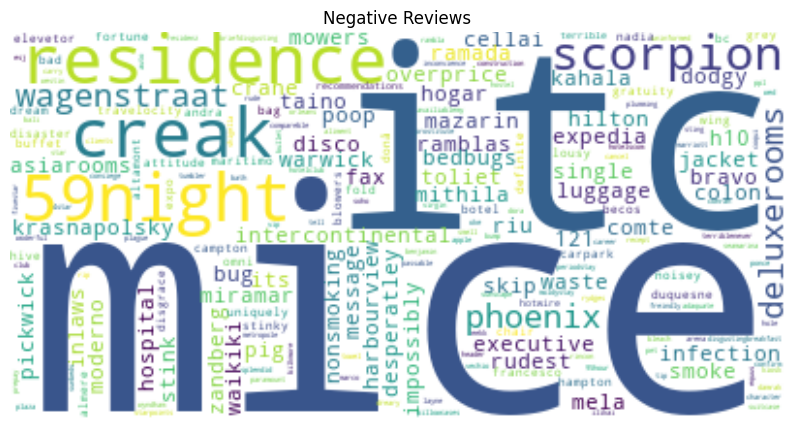

In [100]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis("off")
plt.show()


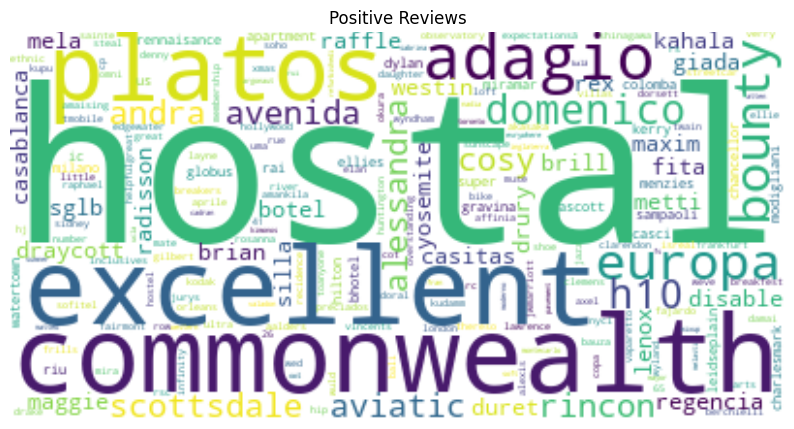

In [101]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis("off")
plt.show()


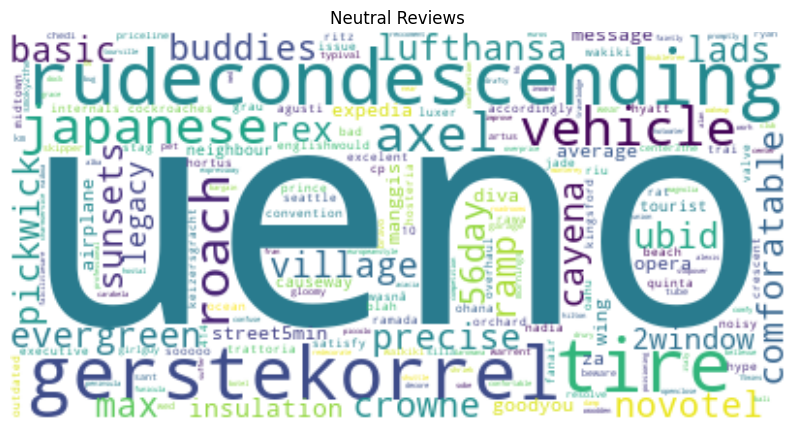

In [102]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Reviews')
plt.axis("off")
plt.show()

In [103]:
encoding_label = {
    1:0,
    2:1,
    3:2,
    4:3,
    5:4
}

In [104]:
df_data['Rating'] = df_data['Rating'].map(encoding_label)
df_data = pd.get_dummies(df_data, columns=['Rating'])
df_data

,Review,label,clean_punc,lemmatized_review,number_review,Rating_0,Rating_1,Rating_2,Rating_3,Rating_4
0,nice hotel expensive parking got good deal sta...,positive,nice hotel expensive parking got good deal sta...,nice hotel expensive park get good deal stay h...,nice hotel expensive park get good deal stay h...,False,False,False,True,False
1,ok nothing special charge diamond member hilto...,negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,False,True,False,False,False
2,nice rooms not 4* experience hotel monaco seat...,neutral,nice rooms not 4 experience hotel monaco seatt...,nice room not 4 experience hotel monaco seattl...,nice room not experience hotel monaco seattle ...,False,False,True,False,False
3,"unique, great stay, wonderful time hotel monac...",positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,False,False,False,False,True
4,"great stay great stay, went seahawk game aweso...",positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,great stay great stay go seahawk game awesome ...,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",positive,best kept secret 3rd time staying charm not 5s...,best keep secret 3rd time stay charm not 5star...,best keep secret time stay charm not ca nt bea...,False,False,False,False,True
20487,great location price view hotel great quick pl...,positive,great location price view hotel great quick pl...,great location price view hotel great quick pl...,great location price view hotel great quick pl...,False,False,False,True,False
20488,"ok just looks nice modern outside, desk staff ...",negative,ok just looks nice modern outside desk staff n...,ok just look nice modern outside desk staff nt...,ok just look nice modern outside desk staff nt...,False,True,False,False,False
20489,hotel theft ruined vacation hotel opened sept ...,negative,hotel theft ruined vacation hotel opened sept ...,hotel theft ruin vacation hotel open sept 17 2...,hotel theft ruin vacation hotel open sept gues...,True,False,False,False,False


In [105]:
x_train, x_test, y_train, y_test = train_test_split(df_data['lemmatized_review'], df_data.iloc[:,4:], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16392,), (4099,), (16392, 6), (4099, 6))

In [106]:
EMBEDDING_DIM = 15
MAXLEN = 32
TRUNCATING = 'post'
PADDING = 'post'
OOV_TOKEN = "<OOV>"
MAX_EXAMPLES = 20000
NUM_LABELS = 5

In [107]:
tokenizer = Tokenizer(num_words=MAX_EXAMPLES, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=MAXLEN, truncating=TRUNCATING, padding=PADDING)
x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [108]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(MAX_EXAMPLES, EMBEDDING_DIM, input_length=MAXLEN),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_LABELS, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])
model.summary()

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 32}

In [ ]:
tokenizer = Tokenizer(num_words=MAX_EXAMPLES, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=MAXLEN, truncating=TRUNCATING, padding=PADDING)
x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [ ]:
history = model.fit(x_train_pad, y_train, epochs=5, validation_data=(x_test_pad, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type bool).

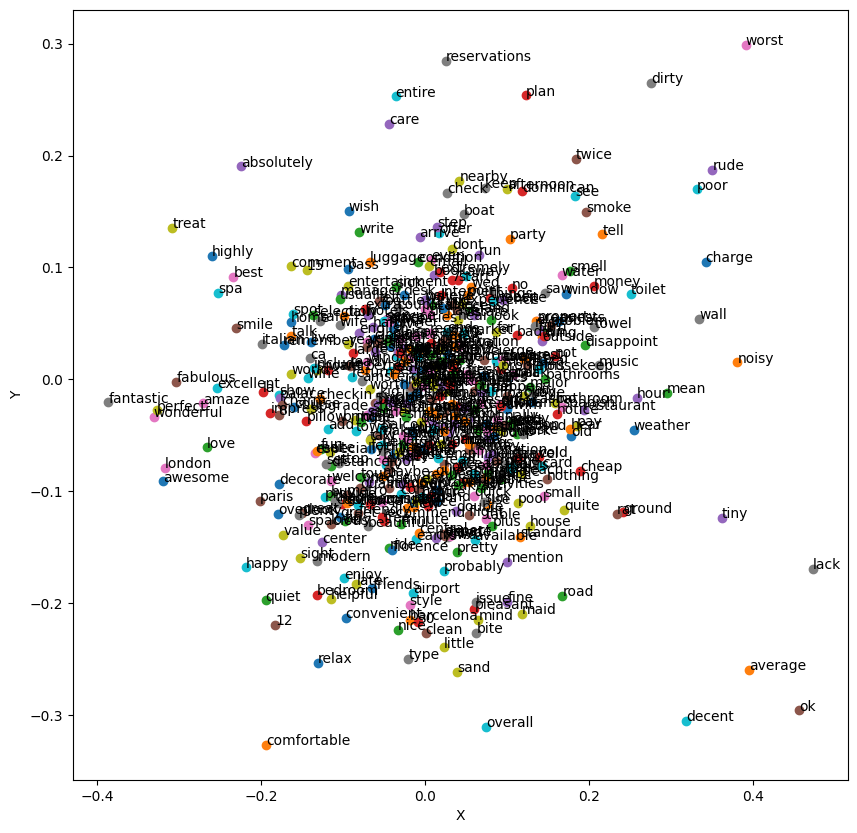

In [ ]:
embeddings = model.layers[0].get_weights()[0]
pca = PCA(n_components=2, random_state=42)
embeddings = pca.fit_transform(embeddings)

# Plot the embeddings
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
word_index = tokenizer.word_index
n_words = min(500, len(word_index))

for word, index in list(word_index.items())[:n_words]:
    x, y = embeddings[index]
    ax.scatter(x, y)
    ax.text(x, y, word)

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

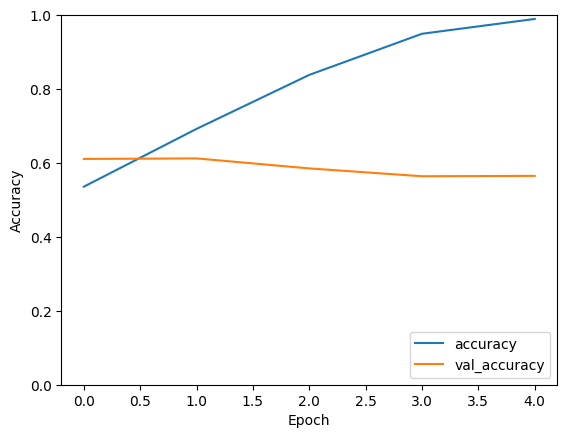

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
df_history_train = pd.DataFrame({
    ' ': ['positive', 'negative'],
    'positive': [history.history['true_positives_5'][-1], history.history['true_negatives_5'][-1]],
    'negative' : [history.history['false_positives_5'][-1], history.history['false_negatives_5'][-1]]
})

df_history_val = pd.DataFrame({
    ' ': ['positive', 'negative'],
    'positive': [history.history['val_true_positives_5'][-1], history.history['val_true_negatives_5'][-1]],
    'negative' : [history.history['val_false_positives_5'][-1], history.history['val_false_negatives_5'][-1]]
})

display(df_history_train)
display(df_history_val)

KeyError: 'true_positives_5'

In [ ]:
model.save('model.h5')